# Milestone 1 - Data Visualization Complementary Views 

## Author - Connor Higgins



## Instructions
1. Create different complementary views of data by applying multiple chart types and aesthetics.
2. Project multiple dimensions using conditioning or faceting (e.g. small multiples) on both categorical and numeric variables.

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
filename = 'https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/JitteredHeadCount.csv'
headcount_df = pd.read_csv(filename)
headcount_df.describe()

Hour      TablesOcc     TablesOpen   TablesClosed  \
count  175677.000000  175677.000000  175677.000000  175677.000000   
mean       11.504431       2.074591       2.555804       1.853430   
std         6.922330       3.307518       3.673229       2.993767   
min         0.000000       0.000000       0.000000       0.000000   
25%         6.000000       0.000000       1.000000       0.000000   
50%        12.000000       1.000000       1.000000       1.000000   
75%        18.000000       2.000000       3.000000       3.000000   
max        23.000000      24.000000      24.000000      23.000000   

           HeadCount      DayOfWeek      DayNumber  
count  175677.000000  175677.000000  175677.000000  
mean        7.390228       3.992953     183.434303  
std        12.458613       1.997989     105.702167  
min         0.000000       1.000000       1.000000  
25%         0.000000       2.000000      92.000000  
50%         3.000000       4.000000     183.000000  
75%         8.000000       6.000000     275.000000  
max       109.000000       7.000000     366.000000

In [3]:
headcount_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175677 entries, 0 to 175676
Data columns (total 9 columns):
GameCode        175677 non-null object
DateFormat      175677 non-null object
Hour            175677 non-null int64
TablesOcc       175677 non-null int64
TablesOpen      175677 non-null int64
TablesClosed    175677 non-null int64
HeadCount       175677 non-null int64
DayOfWeek       175677 non-null int64
DayNumber       175677 non-null int64
dtypes: int64(7), object(2)
memory usage: 12.1+ MB


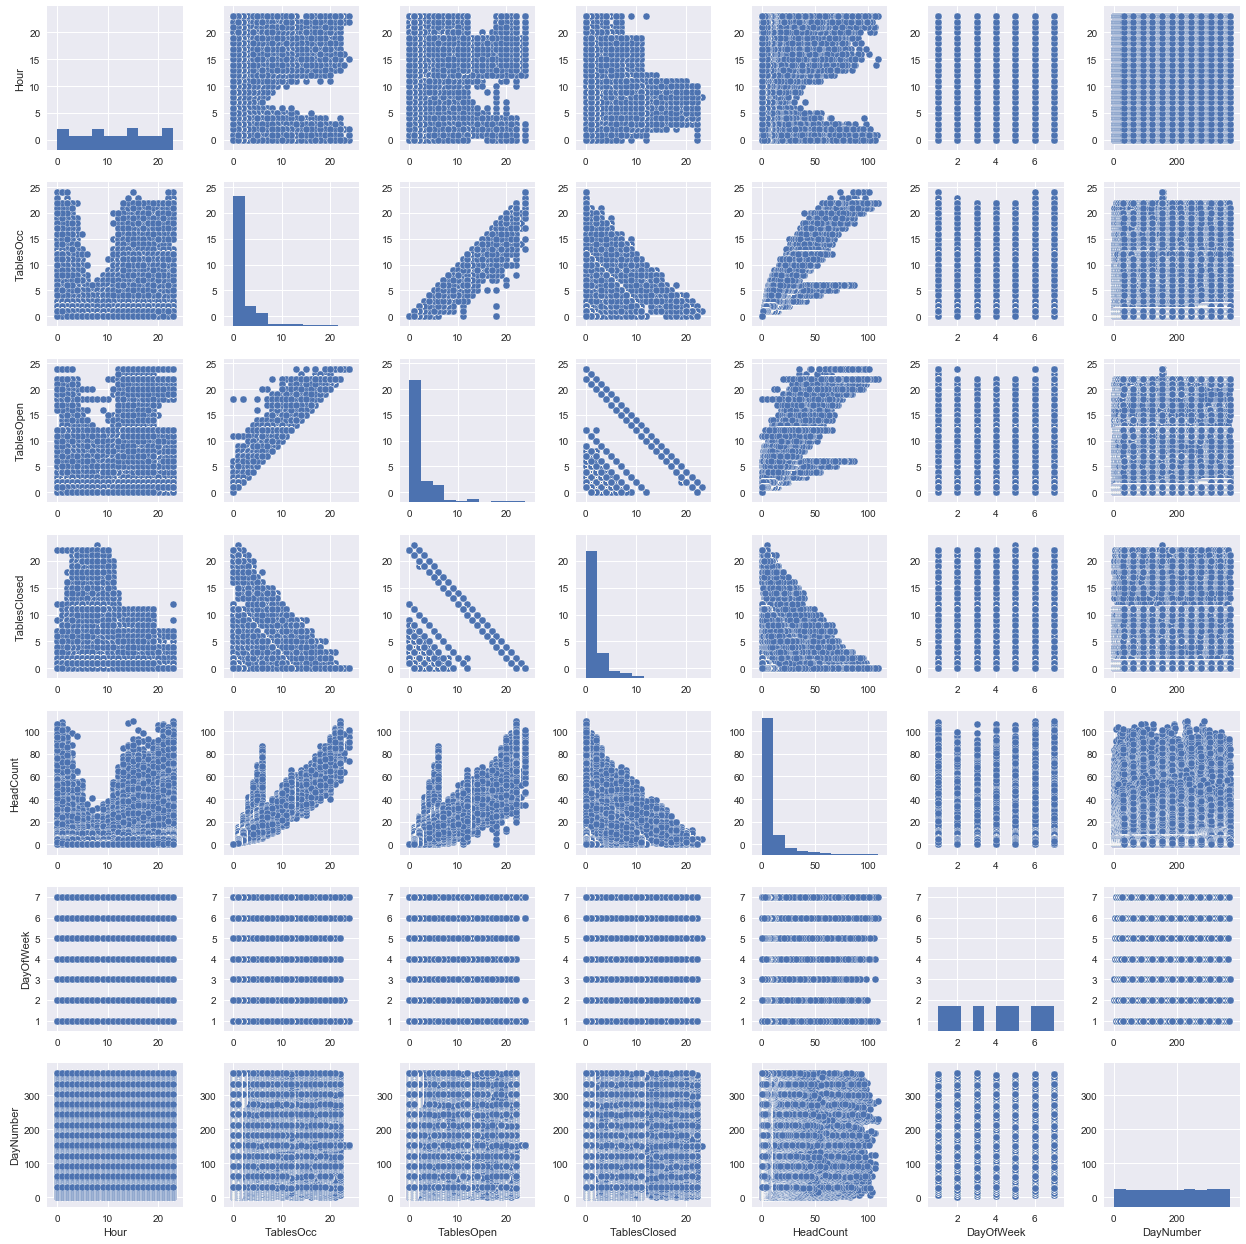

In [4]:
%matplotlib inline
sns.set()
num_cols = headcount_df.corr().columns
sns.pairplot(headcount_df.loc[:, num_cols])

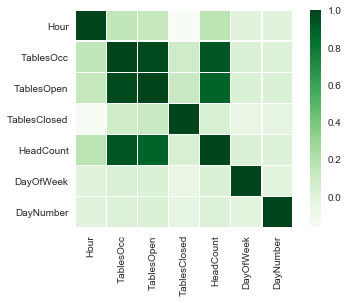

In [5]:
sns.heatmap(headcount_df.corr(), square=True, linewidths=.25, cmap="Greens")

In [6]:
headcount_df['DateFormat'] = pd.to_datetime(headcount_df['DateFormat'])

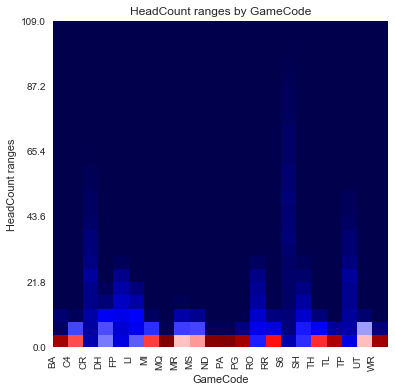

In [57]:
headcount_df.loc[:, 'HeadCount_bin'] = pd.cut(headcount_df.loc[:, 'HeadCount'], bins = 25)
Game_HeadCount = pd.crosstab(headcount_df.loc[:, 'HeadCount_bin'], headcount_df.loc[:, 'GameCode'])
TotalGame_HeadCount = Game_HeadCount.apply(sum, axis = 0)
Game_HeadCount = Game_HeadCount.div(TotalGame_HeadCount, axis = 1)

sns.set()
ax = plt.figure(figsize=(6, 6)).gca() # define axis
ax.pcolor(Game_HeadCount, cmap = 'seismic')
ax.set_xticks(range(Game_HeadCount.shape[1]))
ax.set_xticklabels(Game_HeadCount.columns, rotation=90)
ax.set_xlabel('GameCode')
ax.set_yticklabels(np.linspace(0, np.max(headcount_df.loc[:,'HeadCount']), 6))
ax.set_ylabel('HeadCount ranges')
ax.set_title('HeadCount ranges by GameCode')
plt.show()

In [29]:
headcount_df['HeadCount_bin'].value_counts()

(-0.109, 5.45]     115580
(5.45, 10.9]        24693
(10.9, 16.35]       12742
(16.35, 21.8]        6919
(21.8, 27.25]        4848
(27.25, 32.7]        2317
(32.7, 38.15]        2013
(38.15, 43.6]        1432
(43.6, 49.05]        1338
(49.05, 54.5]         849
(54.5, 59.95]         673
(59.95, 65.4]         620
(65.4, 70.85]         436
(70.85, 76.3]         392
(76.3, 81.75]         267
(81.75, 87.2]         233
(87.2, 92.65]         153
(92.65, 98.1]          97
(98.1, 103.55]         54
(103.55, 109.0]        21
Name: HeadCount_bin, dtype: int64

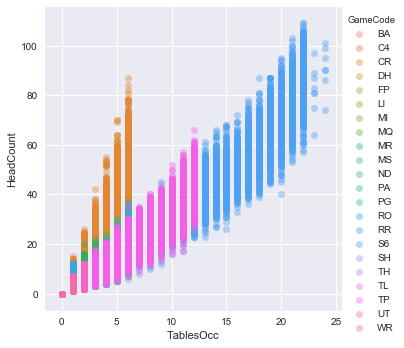

In [40]:
sns.lmplot(x='TablesOcc', y='HeadCount', data=headcount_df, hue='GameCode', fit_reg=False, scatter_kws={'alpha' : 0.4}) # creating seaborn lmplot
plt.show()

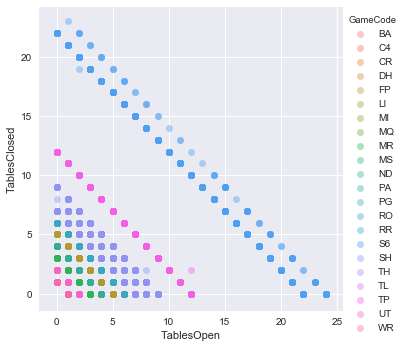

In [48]:
sns.lmplot(x='TablesOpen', y='TablesClosed', data=headcount_df, hue='GameCode', fit_reg=False, scatter_kws={'alpha' : 0.4}) # creating seaborn lmplot
plt.show()

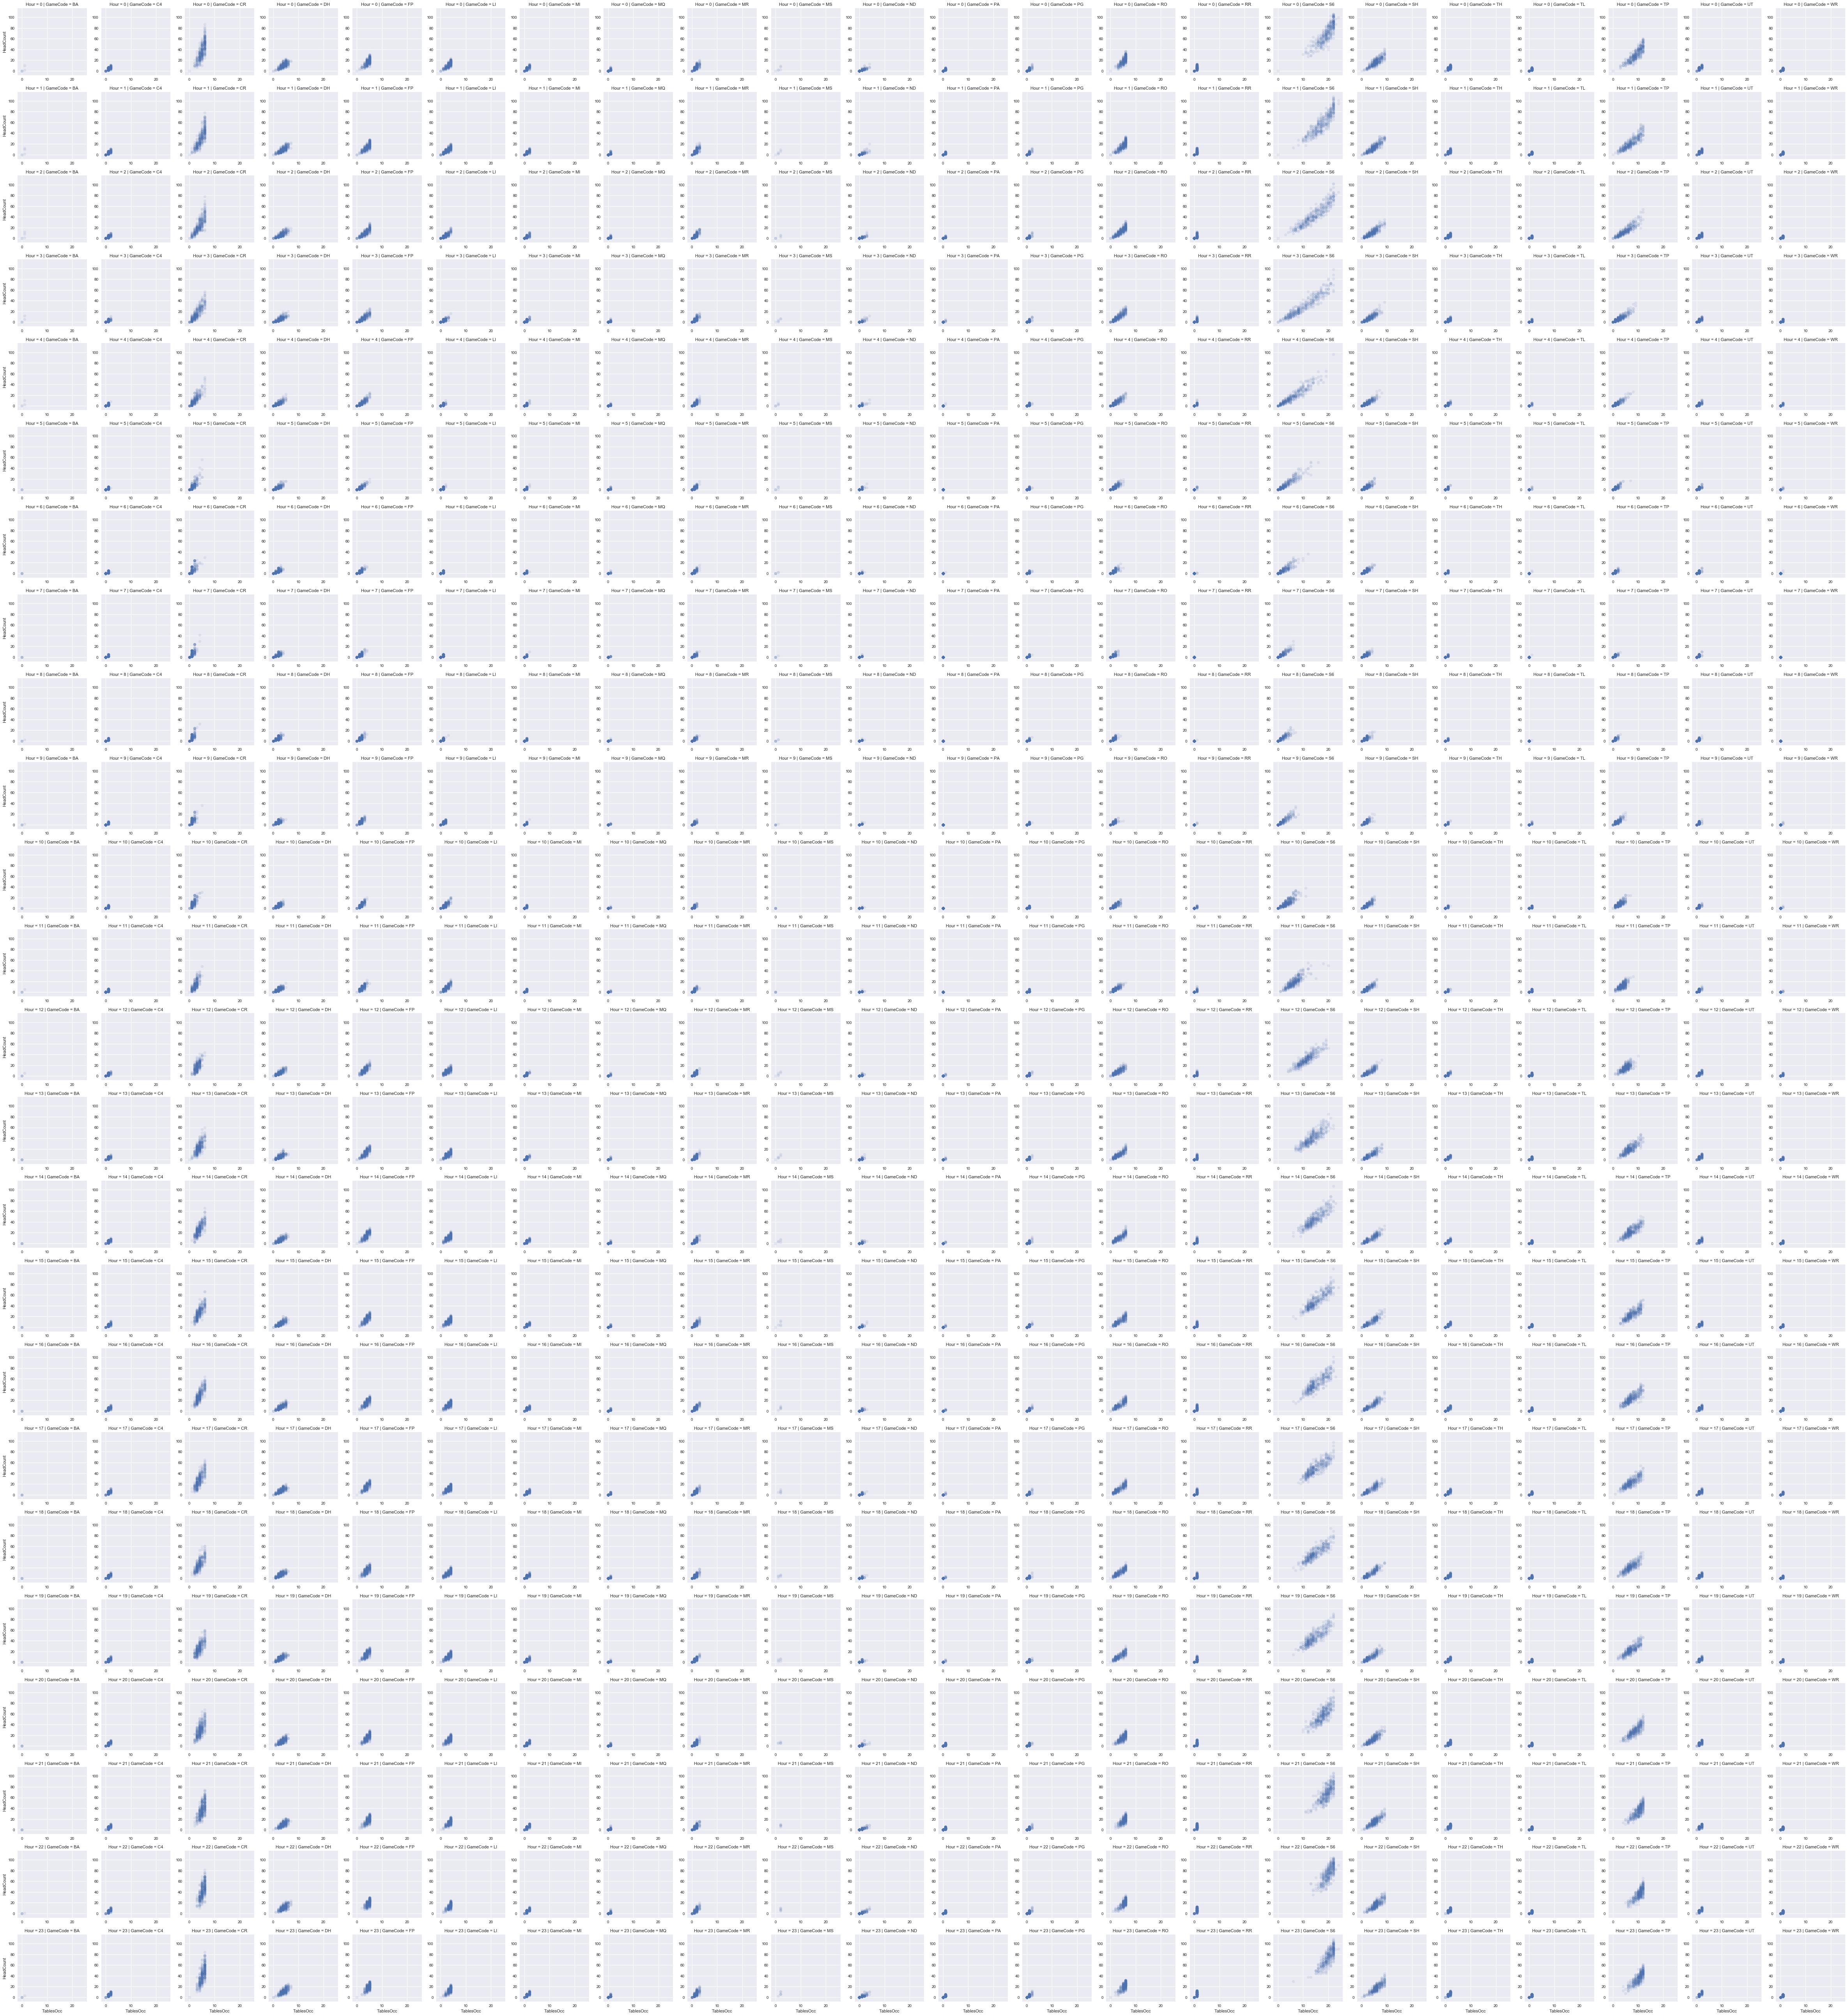

In [61]:
c = sns.FacetGrid(headcount_df,
                 col="GameCode",
                 row="Hour",
                 palette="Set2")
c = c.map(plt.scatter, "TablesOcc", "HeadCount", alpha=.1)

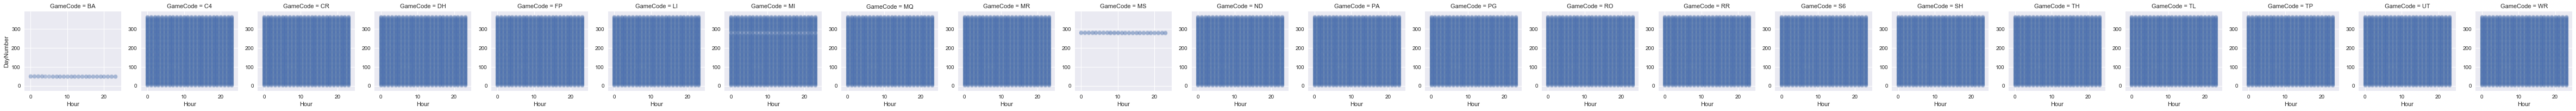

In [63]:
c = sns.FacetGrid(headcount_df,
                 col="GameCode",
                 palette="Set2")
c = c.map(plt.scatter, "Hour", "DayNumber", alpha=.1)

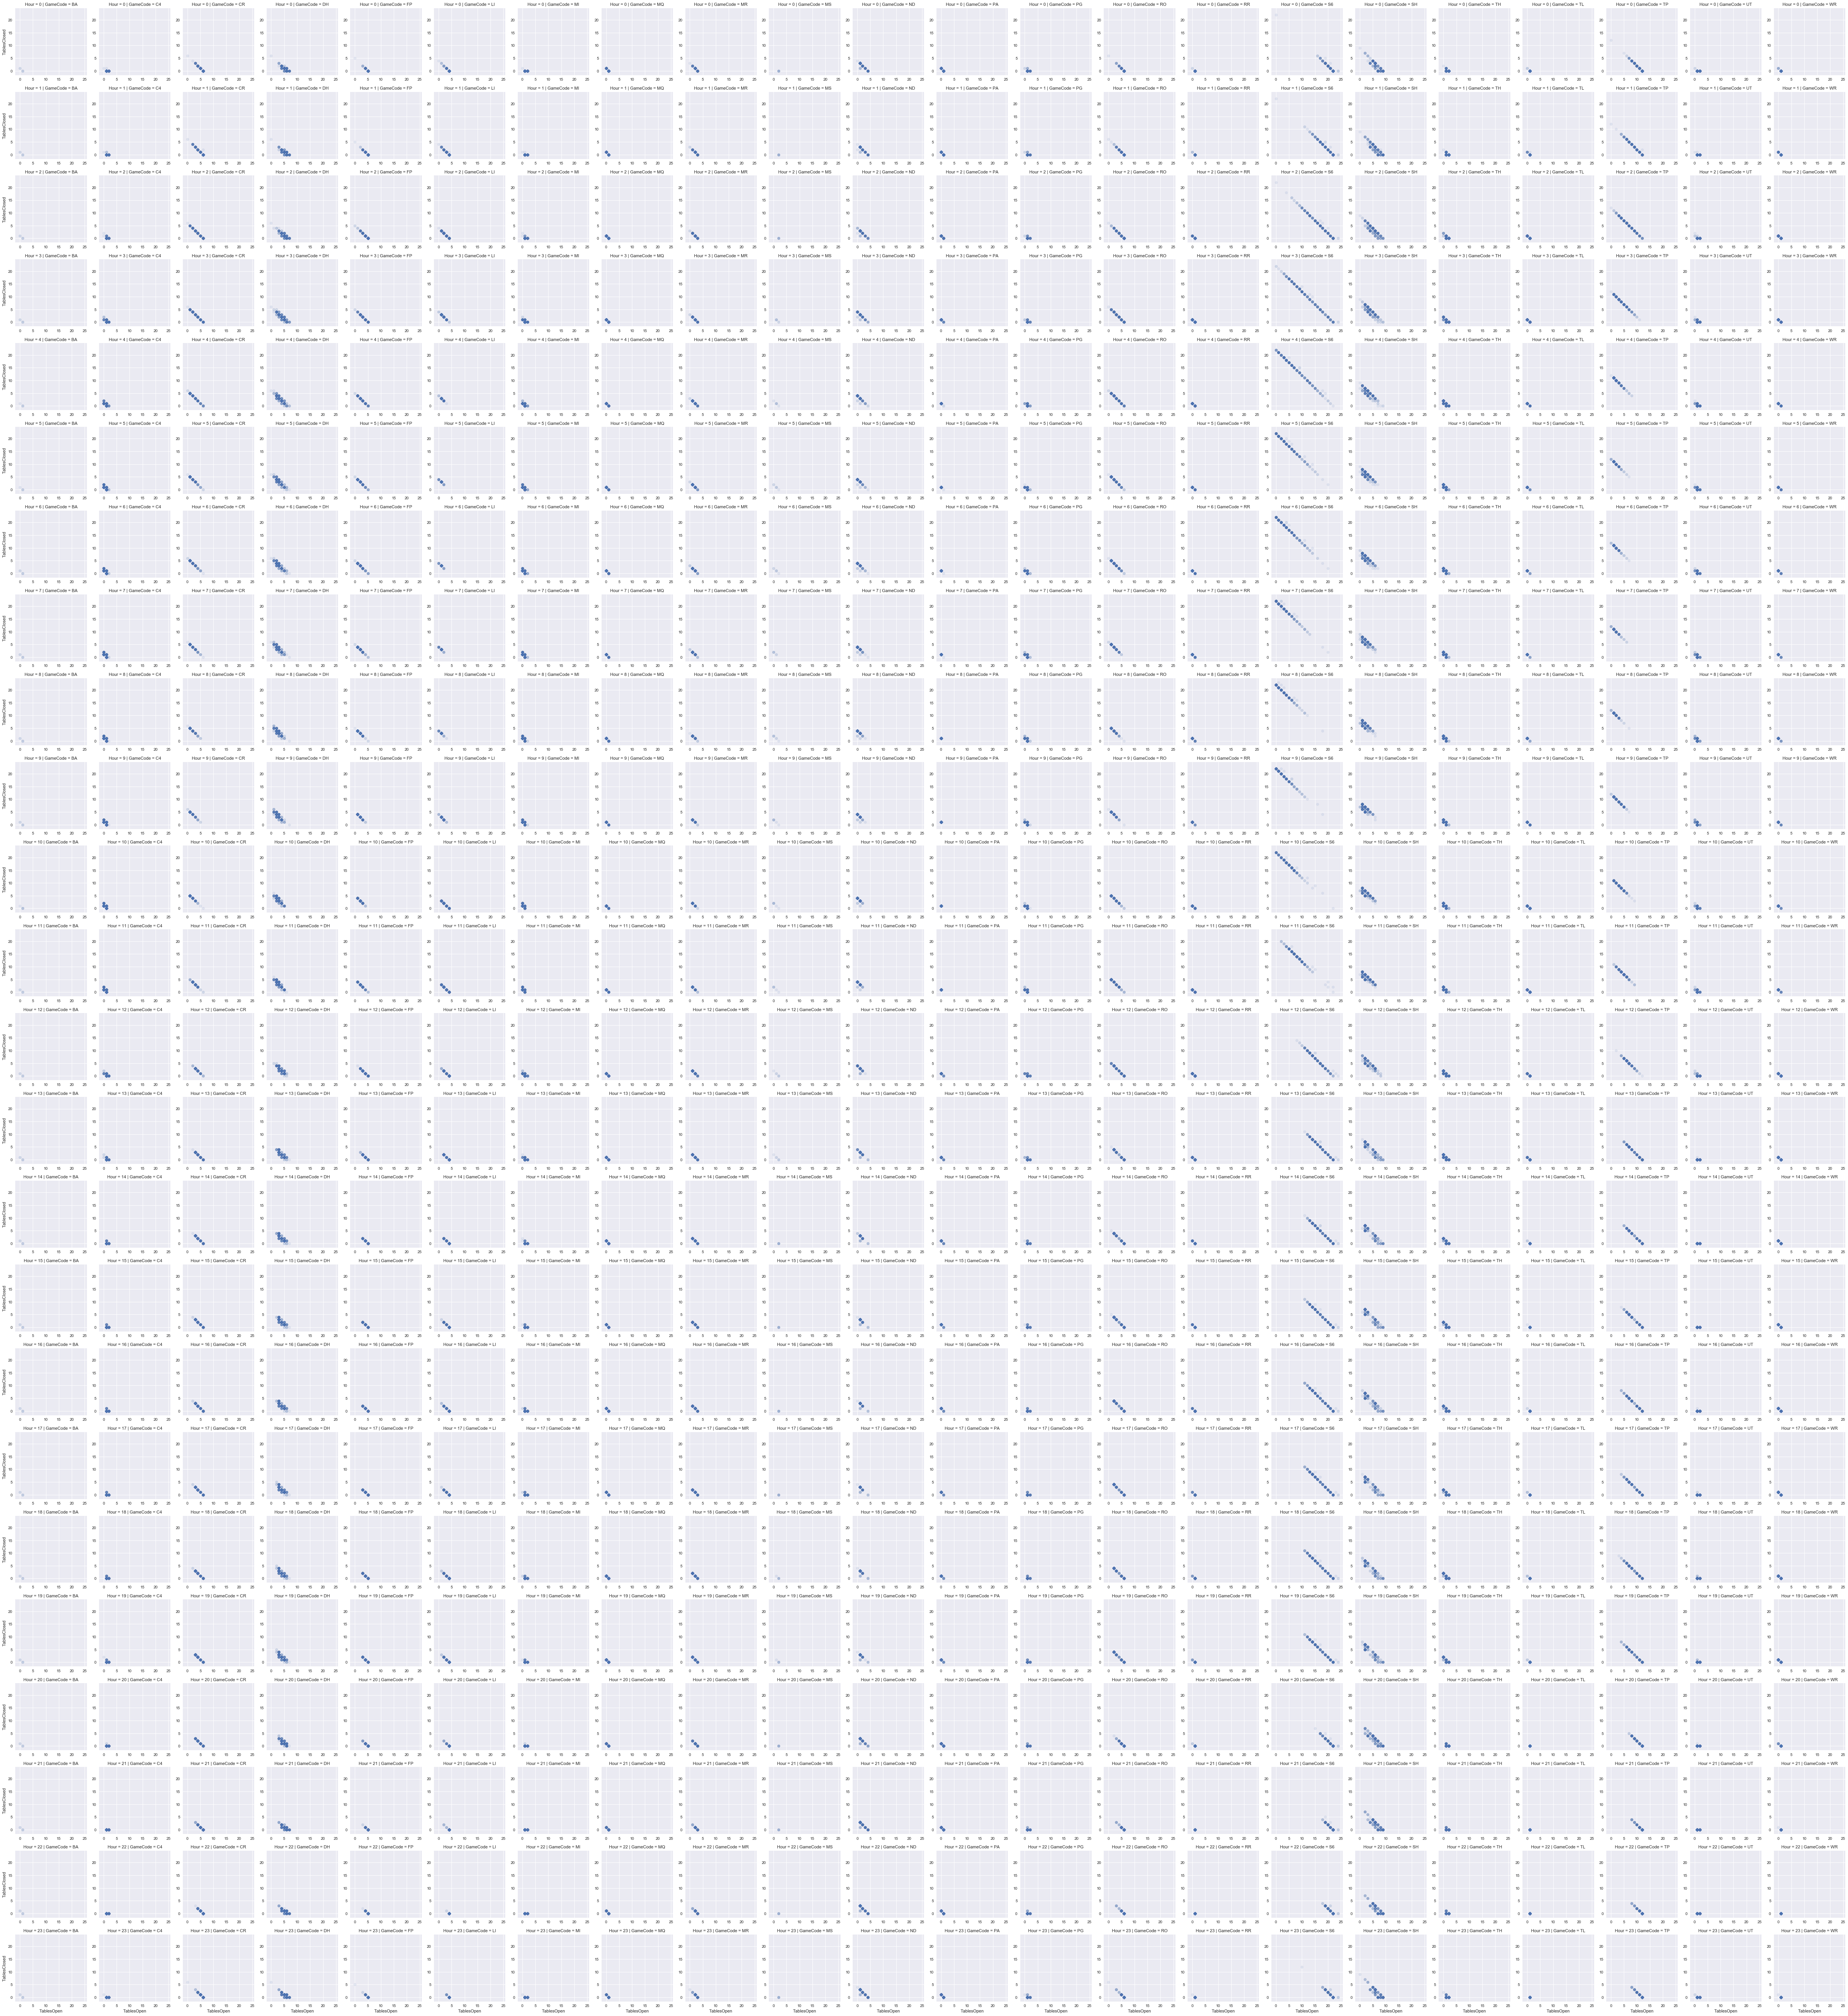

In [66]:
c = sns.FacetGrid(headcount_df,
                 col="GameCode",
                 row="Hour",
                 palette="Set2")
c = c.map(plt.scatter, "TablesOpen", "TablesClosed", alpha=.1)

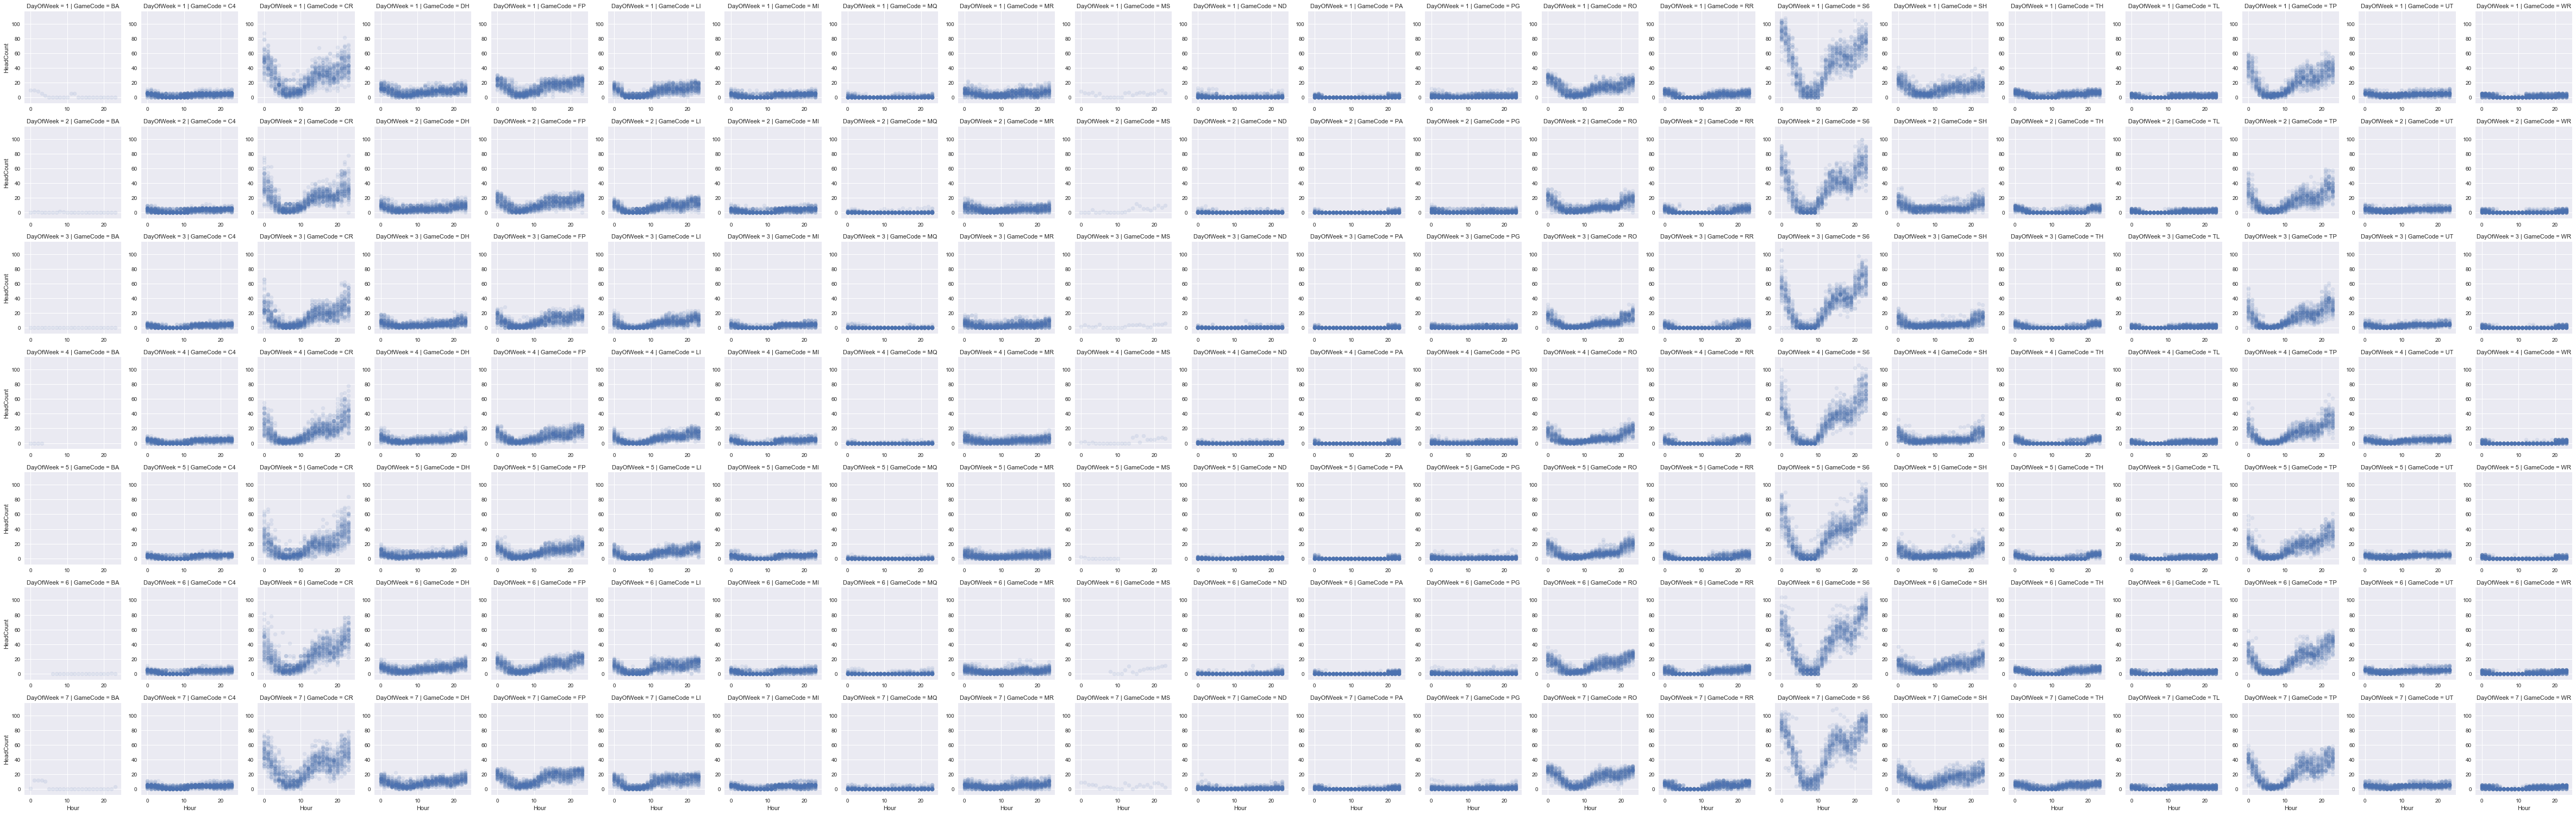

In [68]:
c = sns.FacetGrid(headcount_df,
                 col="GameCode",
                 row="DayOfWeek", 
                 palette="Set2")
c = c.map(plt.scatter, "Hour", "HeadCount", alpha=.1)

In [1]:
dailyheadcount = headcount_df.groupby('GameCode')[['TablesOpen', 'TablesClosed', 'TablesOcc', 'HeadCount']].sum()
dailyheadcount['Closed2OpenRatio'] = dailyheadcount['TablesClosed'].div(dailyheadcount['TablesOpen'])
dailyheadcount['Occ2OpenRatio'] = dailyheadcount['TablesOcc'].div(dailyheadcount['TablesOpen'])
dailyheadcount['HeadCount2TablesOccRatio'] = dailyheadcount['HeadCount'].div(dailyheadcount['TablesOcc'])
dailyheadcount['HeadCount2TablesOpenRatio'] = dailyheadcount['HeadCount'].div(dailyheadcount['TablesOpen'])
dailyheadcount.plot()

NameError: name 'headcount_df' is not defined

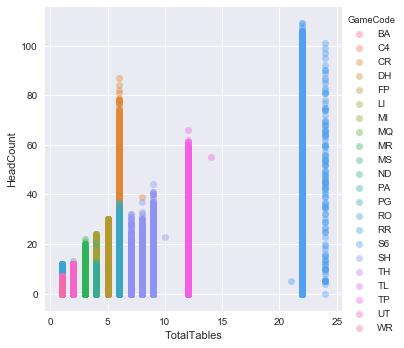

In [62]:
sns.lmplot(x='TotalTables', y='HeadCount', data=headcount_df, hue='GameCode', fit_reg=False, scatter_kws={'alpha' : 0.4}) # creating seaborn lmplot
plt.show()